# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

**COMPLETE THE REQUIRED TASKS:**


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

In [12]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
wholesale_customers = fetch_ucirepo(id=292)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# Check the shape of X
print(X)

# Create a DataFrame from features
df = pd.DataFrame(X, columns=wholesale_customers.variables.name)

# Add the target variable 'y' to the DataFrame
df['Region'] = y
df.head()

     Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0          2  12669   9656     7561     214              2674        1338
1          2   7057   9810     9568    1762              3293        1776
2          2   6353   8808     7684    2405              3516        7844
3          1  13265   1196     4221    6404               507        1788
4          2  22615   5410     7198    3915              1777        5185
..       ...    ...    ...      ...     ...               ...         ...
435        1  29703  12051    16027   13135               182        2204
436        1  39228   1431      764    4510                93        2346
437        2  14531  15488    30243     437             14841        1867
438        1  10290   1981     2232    1038               168        2125
439        1   2787   1698     2510      65               477          52

[440 rows x 7 columns]


name,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


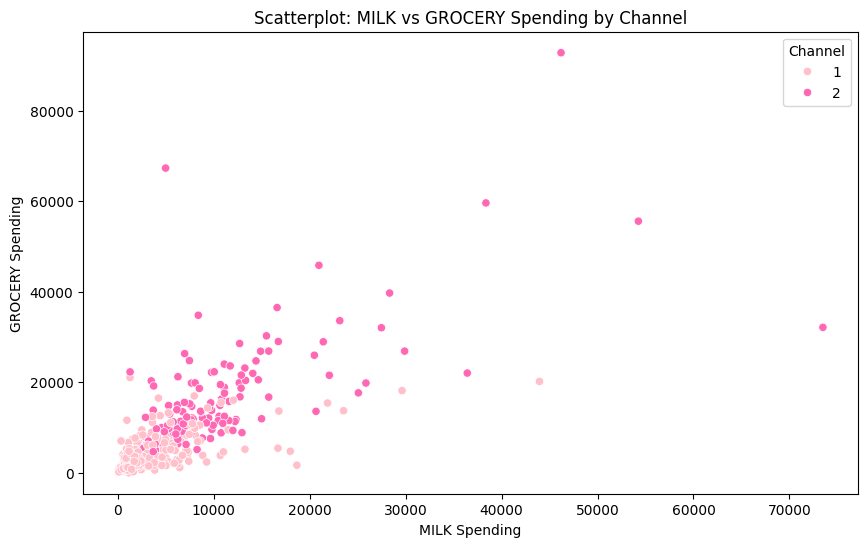

In [16]:
import seaborn as sns

# Define a custom palette with shades of pink
custom_palette = ['#FFC0CB', '#FF69B4']  # You can add more shades if needed

# 1. Scatterplot showing the relation between MILK and GROCERY spending, colored by Channel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', palette=custom_palette)
plt.title('Scatterplot: MILK vs GROCERY Spending by Channel')
plt.xlabel('MILK Spending')
plt.ylabel('GROCERY Spending')
plt.legend(title='Channel')
plt.show()


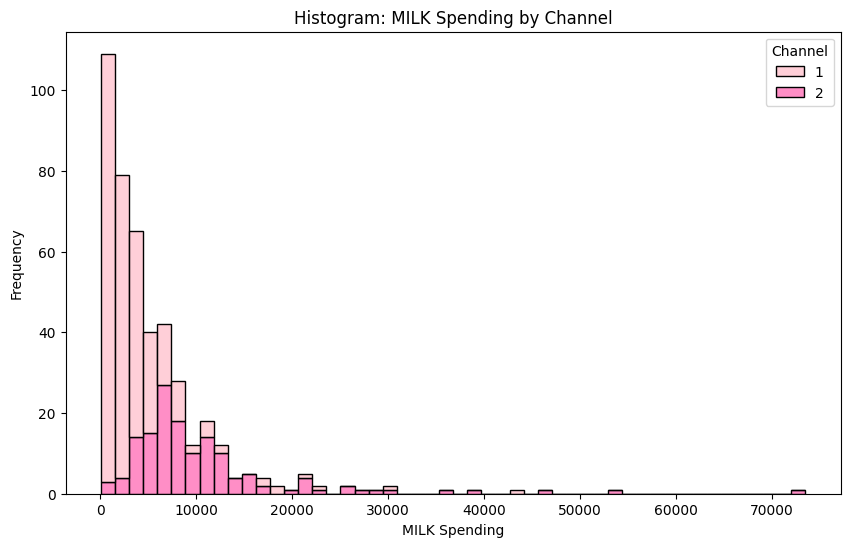

In [17]:
# 2. Histogram of MILK spending, colored by Channel
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack', palette=custom_palette)
plt.title('Histogram: MILK Spending by Channel')
plt.xlabel('MILK Spending')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

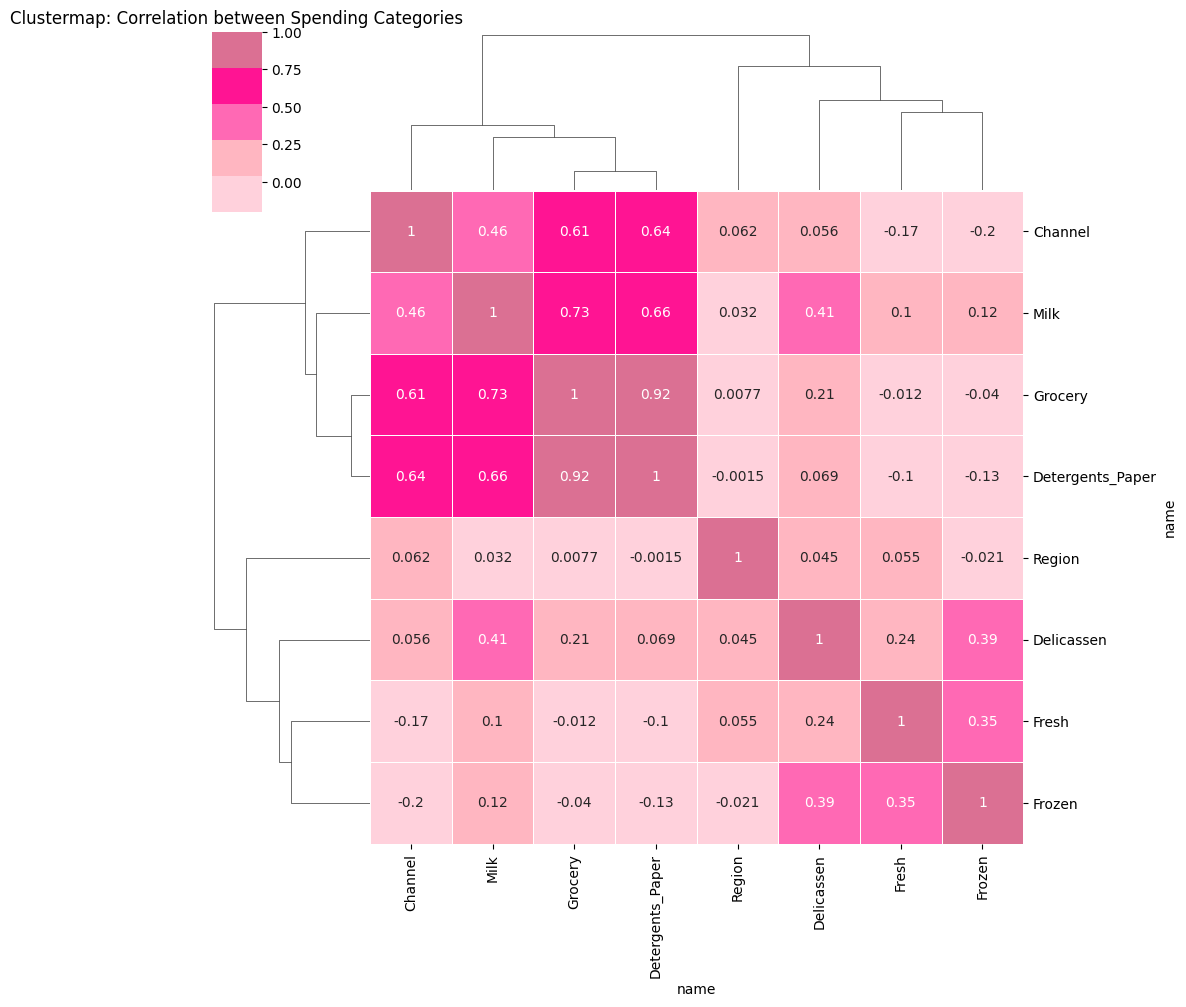

In [21]:
import seaborn as sns

# Define a custom palette with pink shades
custom_palette = sns.color_palette(["#FFD1DC", "#FFB6C1", "#FF69B4", "#FF1493", "#DB7093"], as_cmap=True)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Handle missing or non-finite values
corr_matrix.fillna(0, inplace=True)
corr_matrix = corr_matrix.replace([np.inf, -np.inf], 0)

# Create the clustermap
plt.figure(figsize=(12, 8))
sns.clustermap(corr_matrix, annot=True, cmap=custom_palette, linewidths=.5)
plt.title('Clustermap: Correlation between Spending Categories')
plt.show()


<Figure size 1200x800 with 0 Axes>

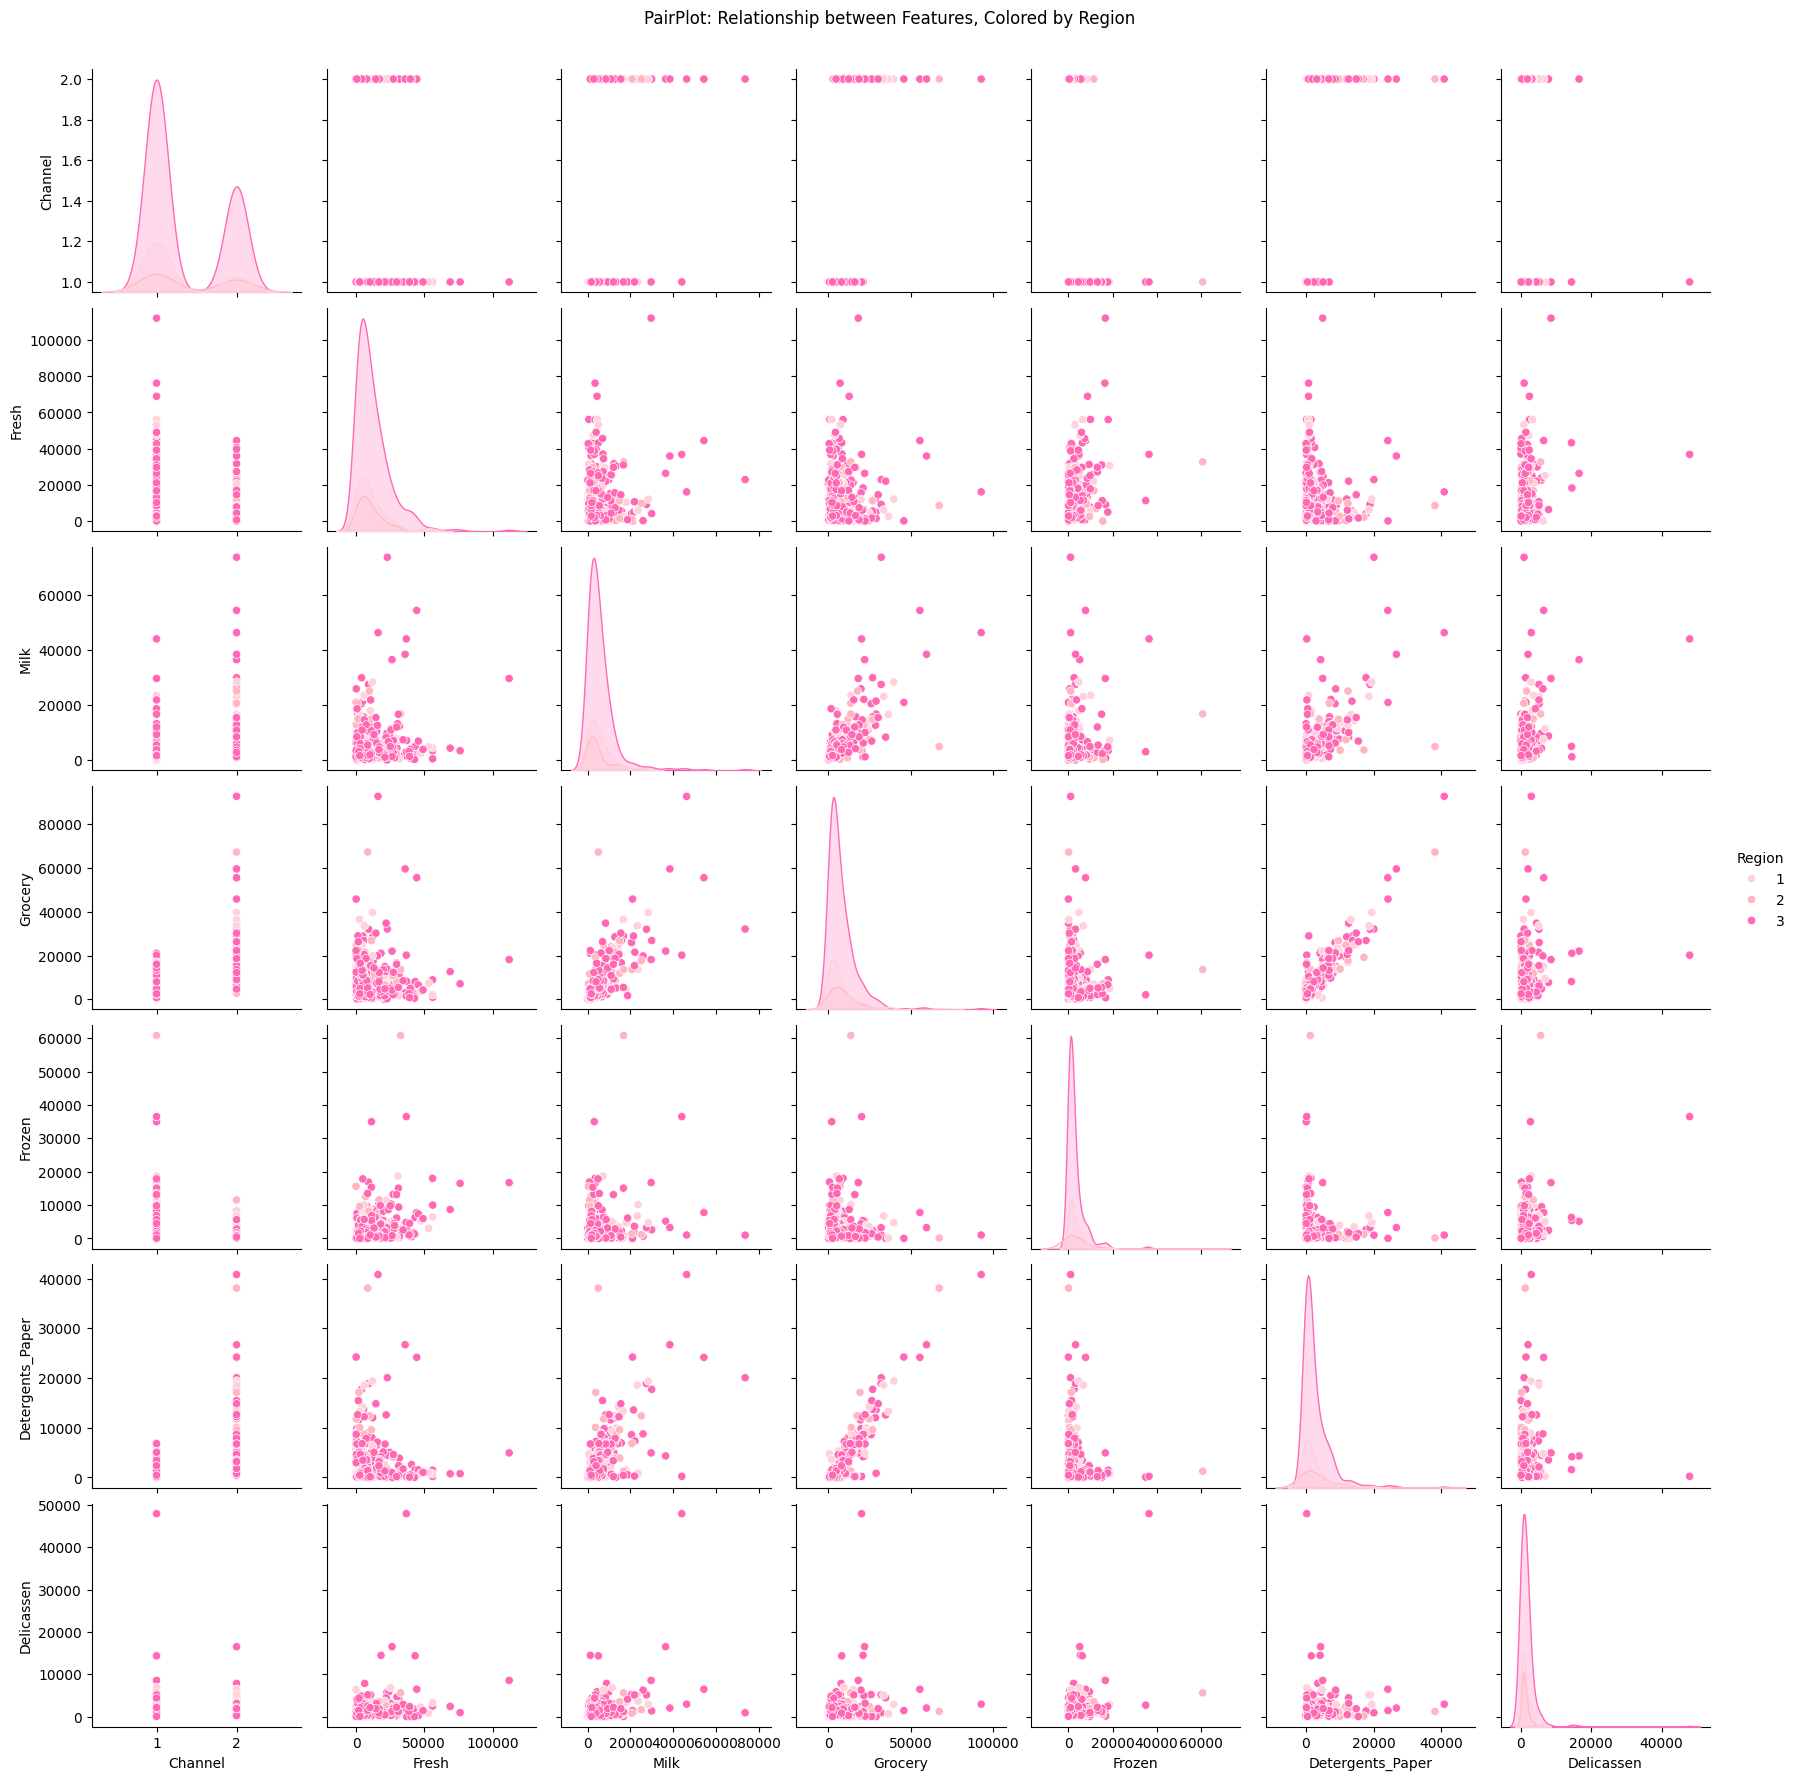

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom palette with pink shades
custom_palette = sns.color_palette(["#FFD1DC", "#FFB6C1", "#FF69B4"], as_cmap=True)

# PairPlot of the dataframe, colored by Region
plt.figure(figsize=(12, 8))
sns.pairplot(data=df, hue='Region', palette=custom_palette)
plt.suptitle('PairPlot: Relationship between Features, Colored by Region', y=1.02)
plt.show()


## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [24]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [25]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define a range of epsilon values
epsilon_values = np.linspace(0.001, 3, 50)

# Initialize an empty list to store the percentage of outlier points for each epsilon value
percentage_outliers = []

# Set min_samples equal to 2 times the number of features
min_samples = 2 * X.shape[1]

# Loop through each epsilon value and fit DBSCAN models
for epsilon in epsilon_values:
    # Create DBSCAN model with current epsilon value
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    
    # Fit the model to the scaled data
    dbscan.fit(X_scaled)
    
    # Calculate the percentage of outlier points (those labeled as -1)
    percentage_outlier = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100
    
    # Append the percentage to the list
    percentage_outliers.append(percentage_outlier)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

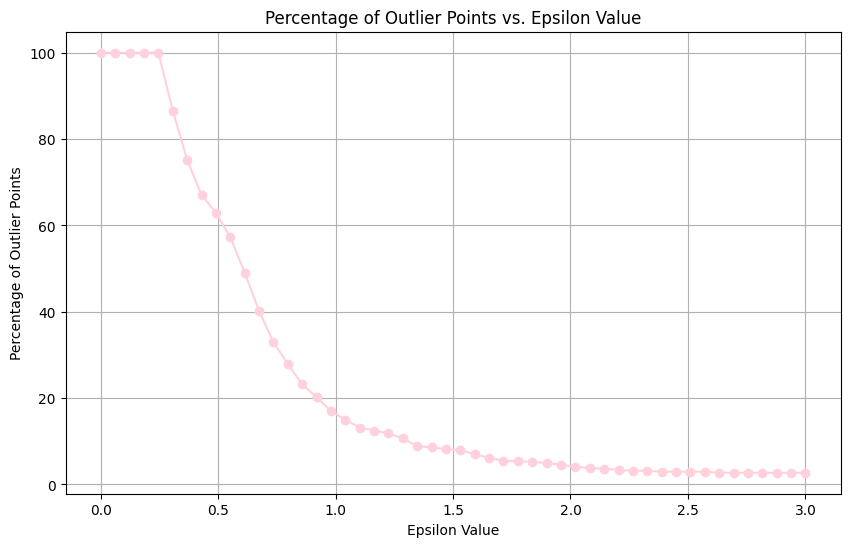

In [26]:
import matplotlib.pyplot as plt

# Define a custom palette with pink shade
custom_palette = ['#FFD1DC']

# Plot the line graph with pink color
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, percentage_outliers, marker='o', linestyle='-', color=custom_palette[0])
plt.title('Percentage of Outlier Points vs. Epsilon Value')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outlier Points')
plt.grid(True)
plt.show()


## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [27]:
from sklearn.cluster import DBSCAN

# Retrain DBSCAN model with epsilon=2
dbscan_model = DBSCAN(eps=2, min_samples=2*X.shape[1])  # Use 2 times the number of features as min_samples
dbscan_labels = dbscan_model.fit_predict(X)


**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

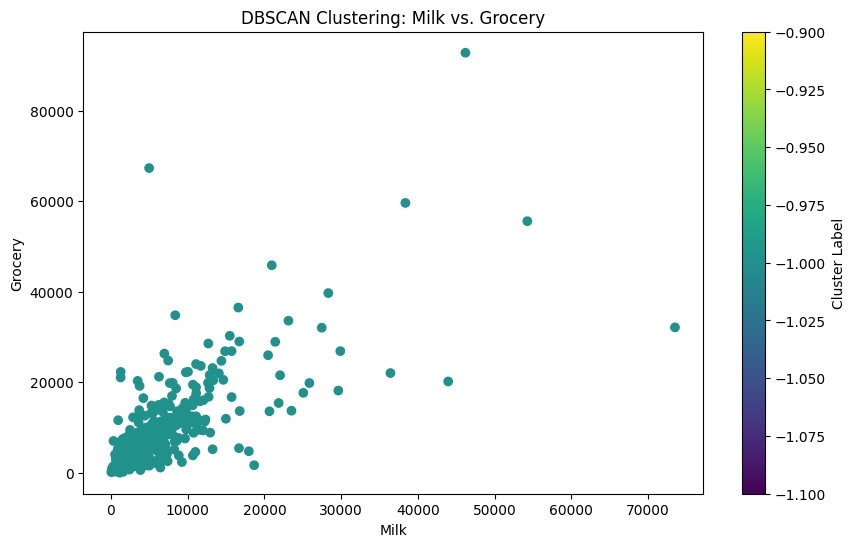

In [29]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df[['Milk', 'Grocery']])

# Create a scatterplot of Milk vs. Grocery, colored by the DBSCAN labels
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Grocery'], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering: Milk vs. Grocery')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.colorbar(label='Cluster Label')
plt.show()


**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

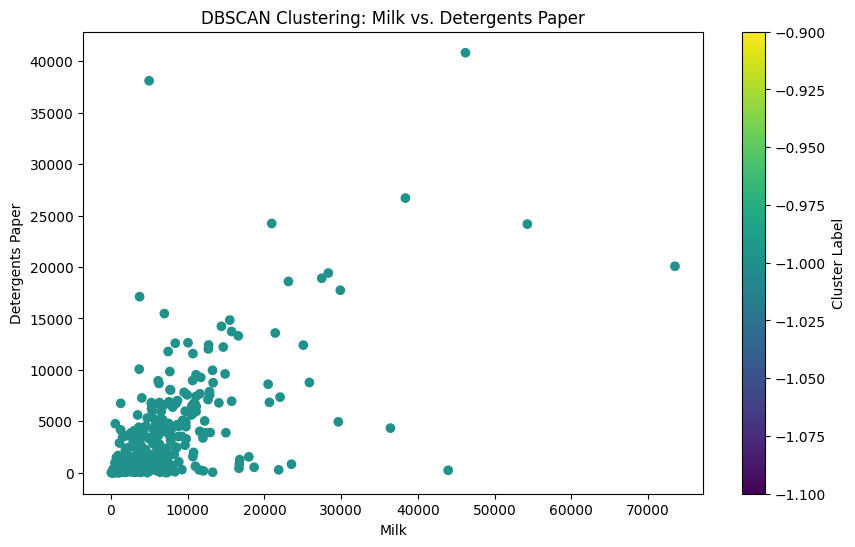

In [30]:
# Create a scatterplot of Milk vs. Detergents Paper, colored by the DBSCAN labels
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Detergents_Paper'], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering: Milk vs. Detergents Paper')
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.colorbar(label='Cluster Label')
plt.show()

In [31]:
# Add a new column called "Labels" to the original dataframe
df['Labels'] = dbscan_labels
df.head()

name,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,-1
1,2,3,7057,9810,9568,1762,3293,1776,-1
2,2,3,6353,8808,7684,2405,3516,7844,-1
3,1,3,13265,1196,4221,6404,507,1788,-1
4,2,3,22615,5410,7198,3915,1777,5185,-1


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [32]:
# Calculate the mean for each spending category for each cluster and outliers
cluster_means = df.groupby('Labels').mean()
outlier_means = df[df['Labels'] == -1].mean()

# Display the mean spending amounts for each category in clusters and outliers
print("Cluster Means:")
print(cluster_means)
print("\nOutlier Means:")
print(outlier_means)

Cluster Means:
name     Channel    Region         Fresh         Milk      Grocery  \
Labels                                                               
-1      1.322727  2.543182  12000.297727  5796.265909  7951.277273   

name         Frozen  Detergents_Paper   Delicassen  
Labels                                              
-1      3071.931818       2881.493182  1524.870455  

Outlier Means:
name
Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Labels                 -1.000000
dtype: float64


**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

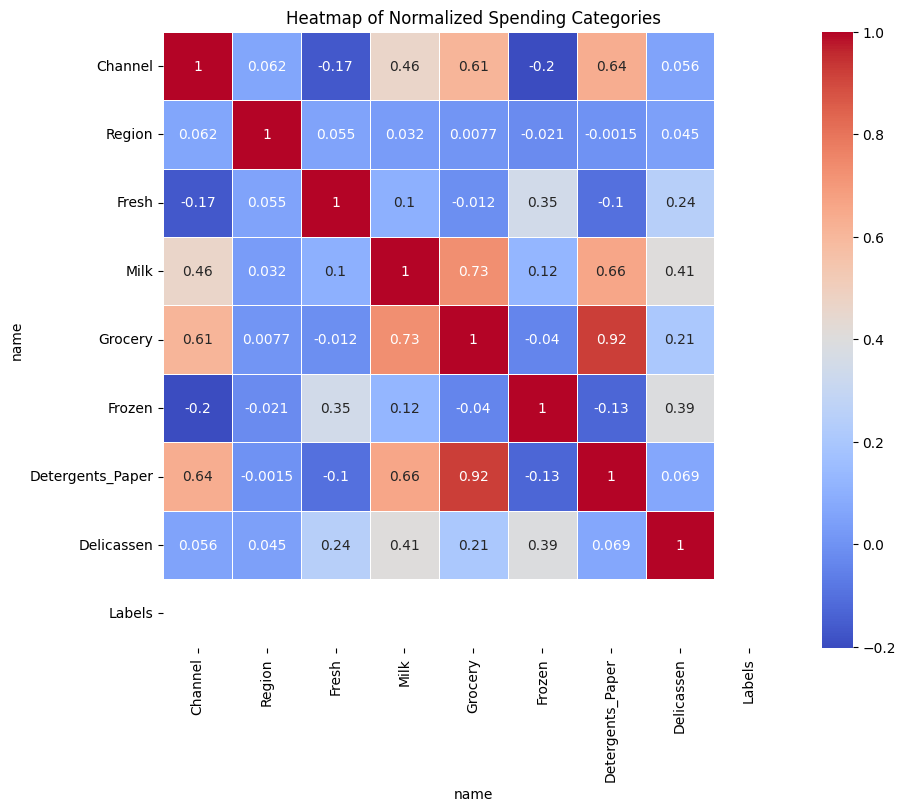

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the dataframe
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Create a heatmap of the normalized values
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Normalized Spending Categories')
plt.show()

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

Number of rows before filtering: 440
Number of rows after filtering: 440


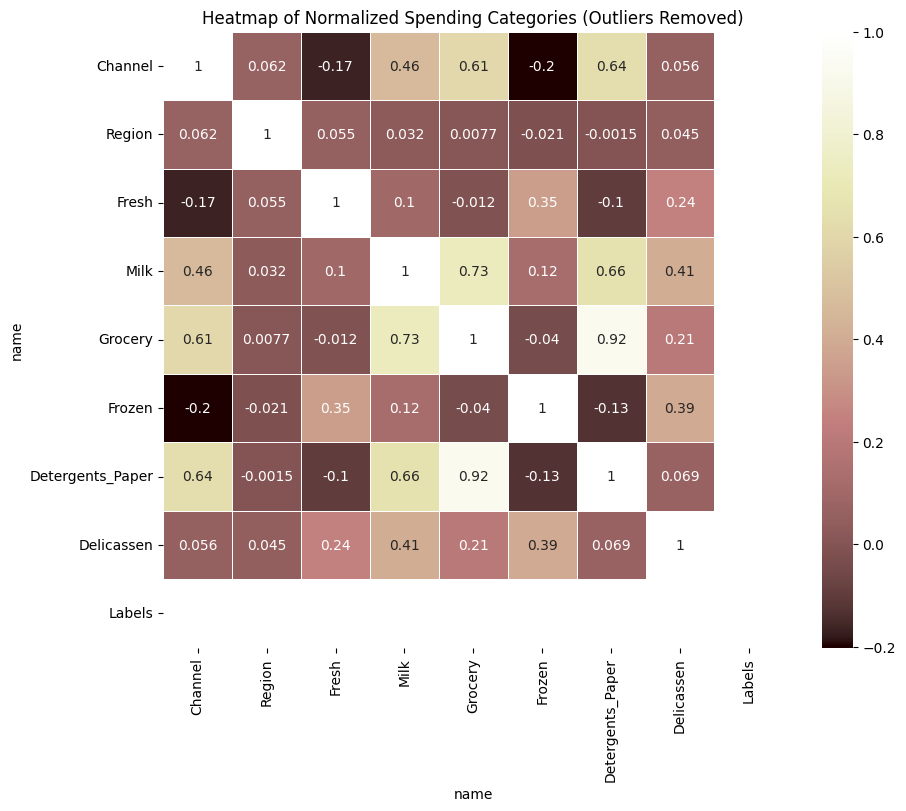

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the outliers based on the 'Labels' column
filtered_df = normalized_df[normalized_df['Labels'] != -1]

# Check the number of rows before and after filtering
print("Number of rows before filtering:", len(normalized_df))
print("Number of rows after filtering:", len(filtered_df))

# Create a heatmap of the filtered normalized values
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df.corr(), annot=True, cmap='pink', linewidths=0.5)
plt.title('Heatmap of Normalized Spending Categories (Outliers Removed)')
plt.show()


**TASK: What spending category were the two clusters mode different in?**

In [35]:
# Calculate the mean spending for each spending category separately for each cluster
cluster_means = df.groupby('Labels').mean()

# Calculate the absolute difference between the means of each spending category for the two clusters
absolute_difference = cluster_means.diff().abs()

# Drop the first row, as it contains NaN values resulting from the diff operation
absolute_difference = absolute_difference.dropna()

# Check if absolute_difference DataFrame is empty
if not absolute_difference.empty:
    # Identify the spending category with the highest absolute difference
    most_different_category = absolute_difference.idxmax()
else:
    most_different_category = None
    
print("Most different spending category between clusters:", most_different_category)


Most different spending category between clusters: None
